# Deep Learning Major Task
## CNN Leaf Classification

<ol>
  <li><a href="#description">description</a></li>
  <li><a href="#part-i">Part I: Data Preparation</a>
    <ol>
      <li><a href="#describe-data">Describe the Data</a></li>
      <li><a href="#clean-data">Clean the Data</a></li>
      <li><a href="#check-values">Check for Missing Values and Duplicates</a></li>
      <li><a href="#visualize-data">Visualize the Data</a></li>
      <li><a href="#draw-images">Draw Images</a></li>
      <li><a href="#correlation-analysis">Correlation Analysis</a></li>
      <li><a href="#divide-data">Divide the Data</a></li>
      <li><a href="#standardize-data">Standardize the Data</a></li>
      <li><a href="#encode-labels">Encode the Labels</a></li>
    </ol>
  </li>
  <li><a href="#part-ii">Part II: Training a Neural Network (CNN)</a>
    <ol>
      <li><a href="#implement-a-cnn-model">Implement a CNN Model</a></li>
      <li><a href="#write-training-function">Write Training Function</a></li>
      <li><a href="#explore-hyperparameter-settings">Explore Hyperparameter Settings</a></li>
      <li><a href="#tensorboard-monitoring">TensorBoard Monitoring</a></li>
      <li><a href="#evaluation-function">Evaluation Function</a></li>
    </ol>
  </li>
</ol>

<h3>Description</h3>
<a id="description"></a>

### First lets write our imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Part I: Data Preparation
<a id="part-i"></a>

<h2>Taking a look and Describing the data</h2>
<a id="describe-data"></a>

### Training dataset

In [2]:
# Load the training set
train_df = pd.read_csv(r'.\data_files\train.csv')

print("#-----> First 5 rows of the training set:\n")
train_df.head(5)

#-----> First 5 rows of the training set:



,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
print("-----> training set description:")
train_df.describe()

-----> training set description:


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [4]:
print("-----> training set information")
train_df.info()

-----> training set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
print("-----> training set value types")
train_df.dtypes

-----> training set value types


id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

### Testing dataset

In [6]:
# Load the testing set
test_df = pd.read_csv(r'.\data_files\test.csv')

print("#-----> First 5 rows of the testing set:")
test_df.head(5)

#-----> First 5 rows of the testing set:


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [7]:
print("-----> testing set description:")
test_df.describe()

-----> testing set description:


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [8]:
print("-----> testing set information")
test_df.info()

-----> testing set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [9]:
print("-----> testing set value types")
test_df.dtypes

-----> testing set value types


id             int64
margin1      float64
margin2      float64
margin3      float64
margin4      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 193, dtype: object

<h2>Cleaning the data</h2>
<a id="clean-data"></a>

### Checking the data for missing values or duplicates and carrying out proper correction methods
<a id="check-values"></a>

In [10]:
# Check for missing values
print("Missing values:\n", train_df.isnull().sum(), "\n")

# Check for duplicates
print("Duplicate values:\n", train_df.duplicated().sum())


Missing values:
 id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64 

Duplicate values:
 0


### ----> Looks like we don't have any missing or duplicate values

Before we continue lets setup our data by dropping the the id and species from the features and set the target on species

In [11]:
# Exclude 'id' and 'species' columns
X_features = train_df.drop(['id', 'species'], axis=1)
y_target = train_df['species']

## Visualizing the data
<a id="viualize-data"></a>

In [12]:
### Feature Distributions

features = train_df.iloc[:, 1:]  # Assuming features start from column 2
# plt.figure(figsize=(12, 8))
# for i, feature in enumerate(features.columns, 1):
#     plt.subplot(3, 3, i)
#     sns.histplot(train_df[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
# plt.tight_layout()
# plt.show()


# features = train_df.iloc[:, 1:]
# plt.figure(figsize=(12, 3 * features.shape[1]))  # Adjust the figure height based on the number of features
# for i, feature in enumerate(features.columns, 1):
#     plt.subplot(features.shape[1], 1, i)
#     sns.histplot(train_df[feature], kde=True)
#     plt.title(f'Distribution of {feature}')

# plt.tight_layout()
# plt.show()

In [13]:
# # Visualization 3: Pairwise Feature Scatter Plots
# sns.pairplot(train_df.sample(IMAGE_SIZE), hue='species', diag_kind='kde')
# plt.suptitle('Pairwise Scatter Plots for Features', y=1.02)
# plt.show()

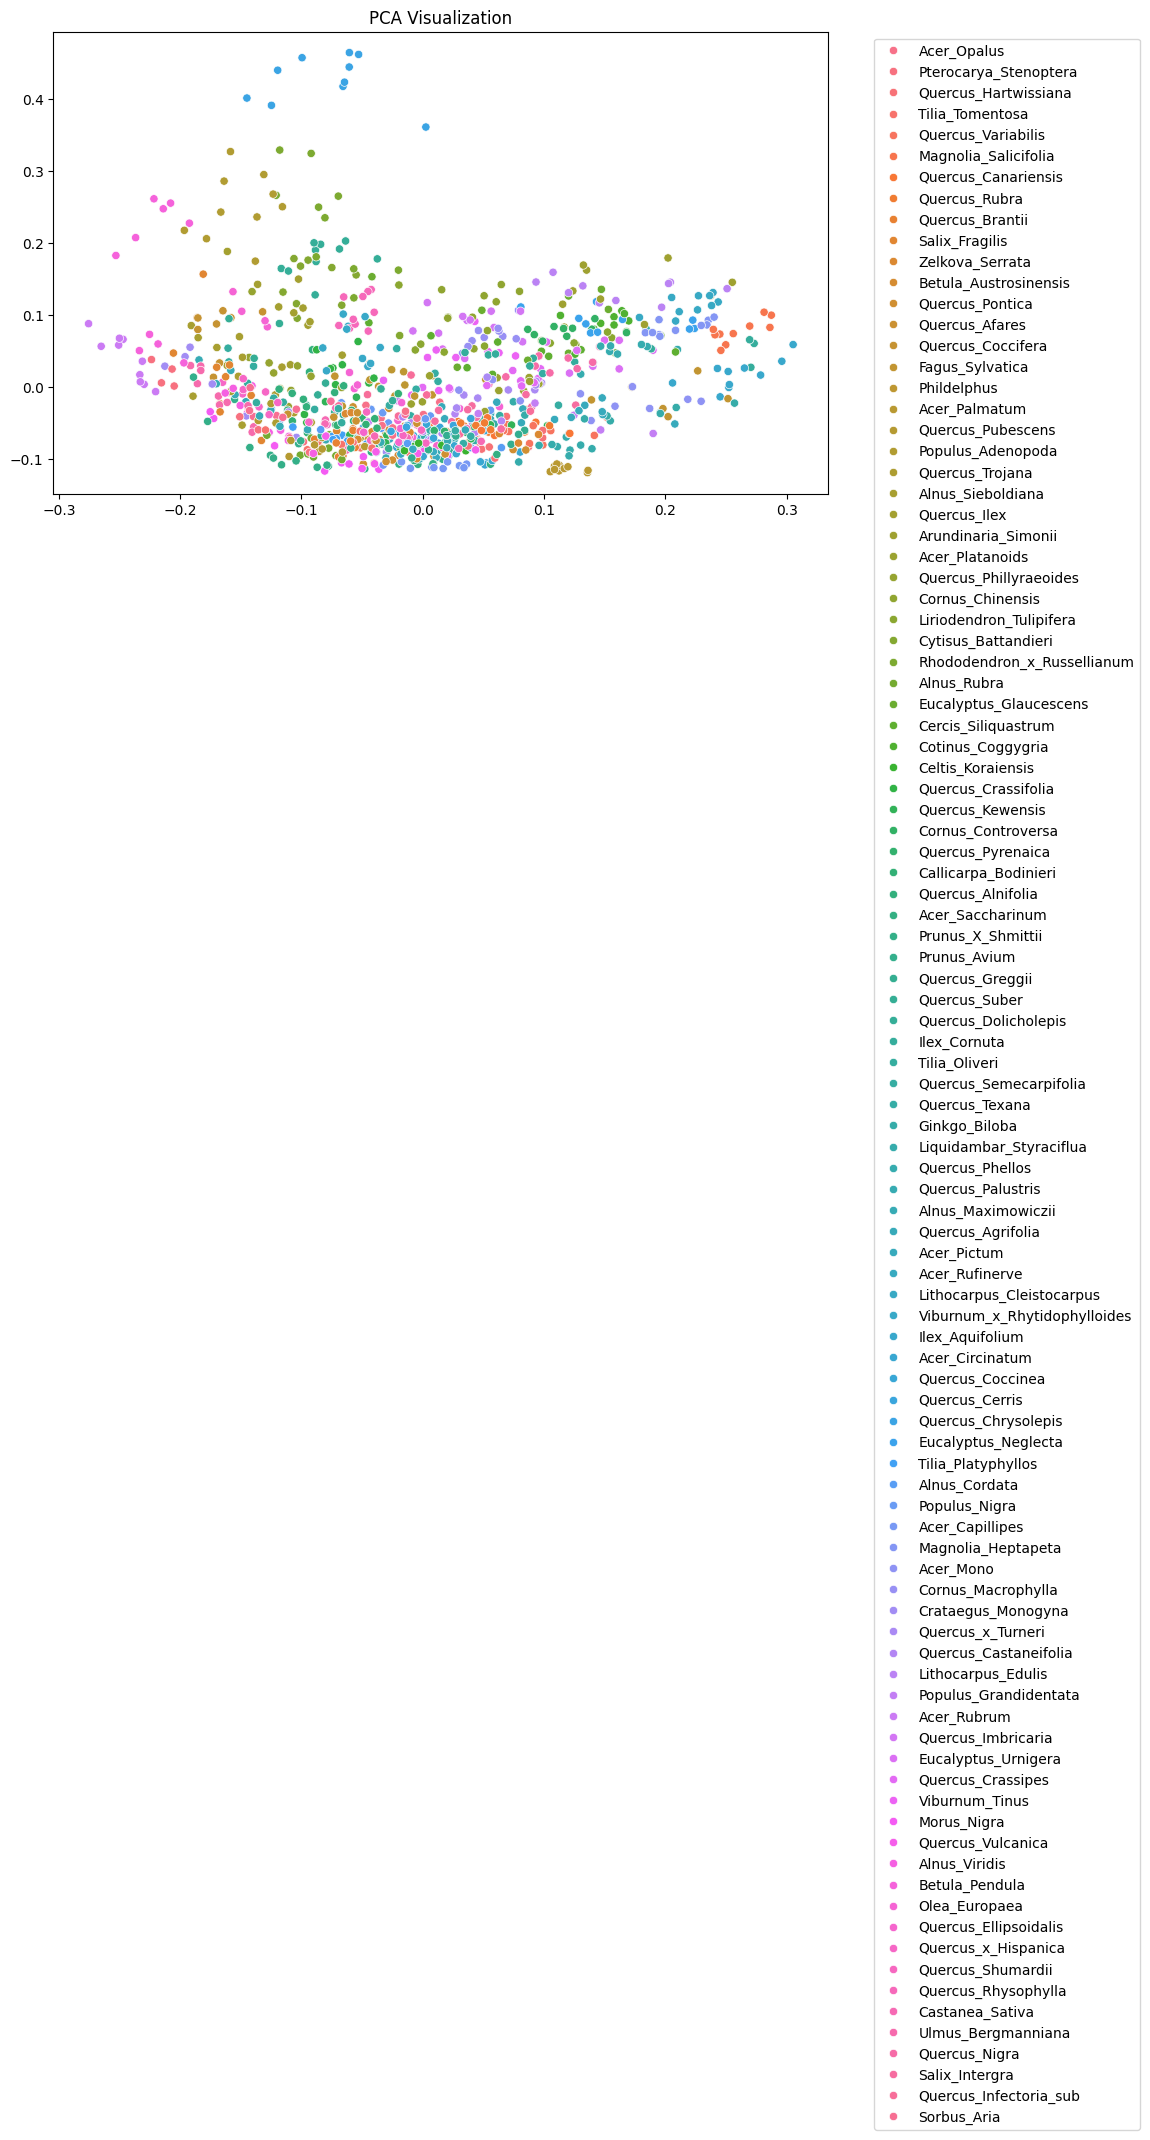

In [14]:
# Dimensionality Reduction Visualization (using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=train_df['species'])
plt.title('PCA Visualization')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



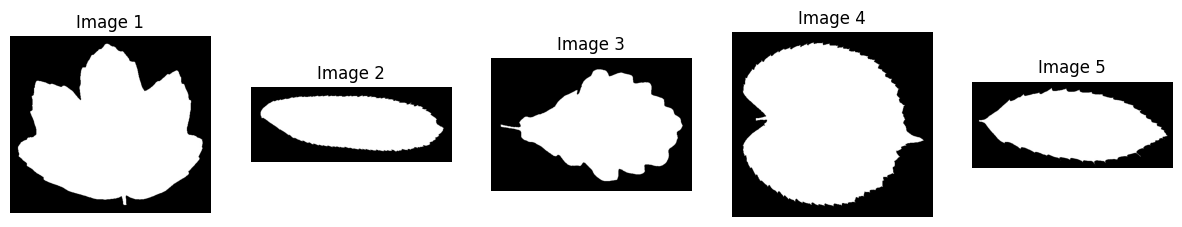

In [15]:
from PIL import Image
import os

image_dir = '.\data_files\images'
image_ids = train_df['id'].head(5).tolist() 

plt.figure(figsize=(15, 8))

for layer_number, image_id in enumerate(image_ids, 1):
    image_path = os.path.join(image_dir, f"{image_id}.jpg")
    image = Image.open(image_path).convert('RGB')

    plt.subplot(1, 5, layer_number)
    plt.imshow(image)
    plt.title(f"Image {layer_number}")
    plt.axis('off')

plt.show()


<h2>Correlation Analysis </h2>
<a id="correlation-analysis"></a>

we are going to calculate the correlation matrix for shape features<br>
we will use heatmap


## Correlation Matrix and Distribution for Each Feature Group

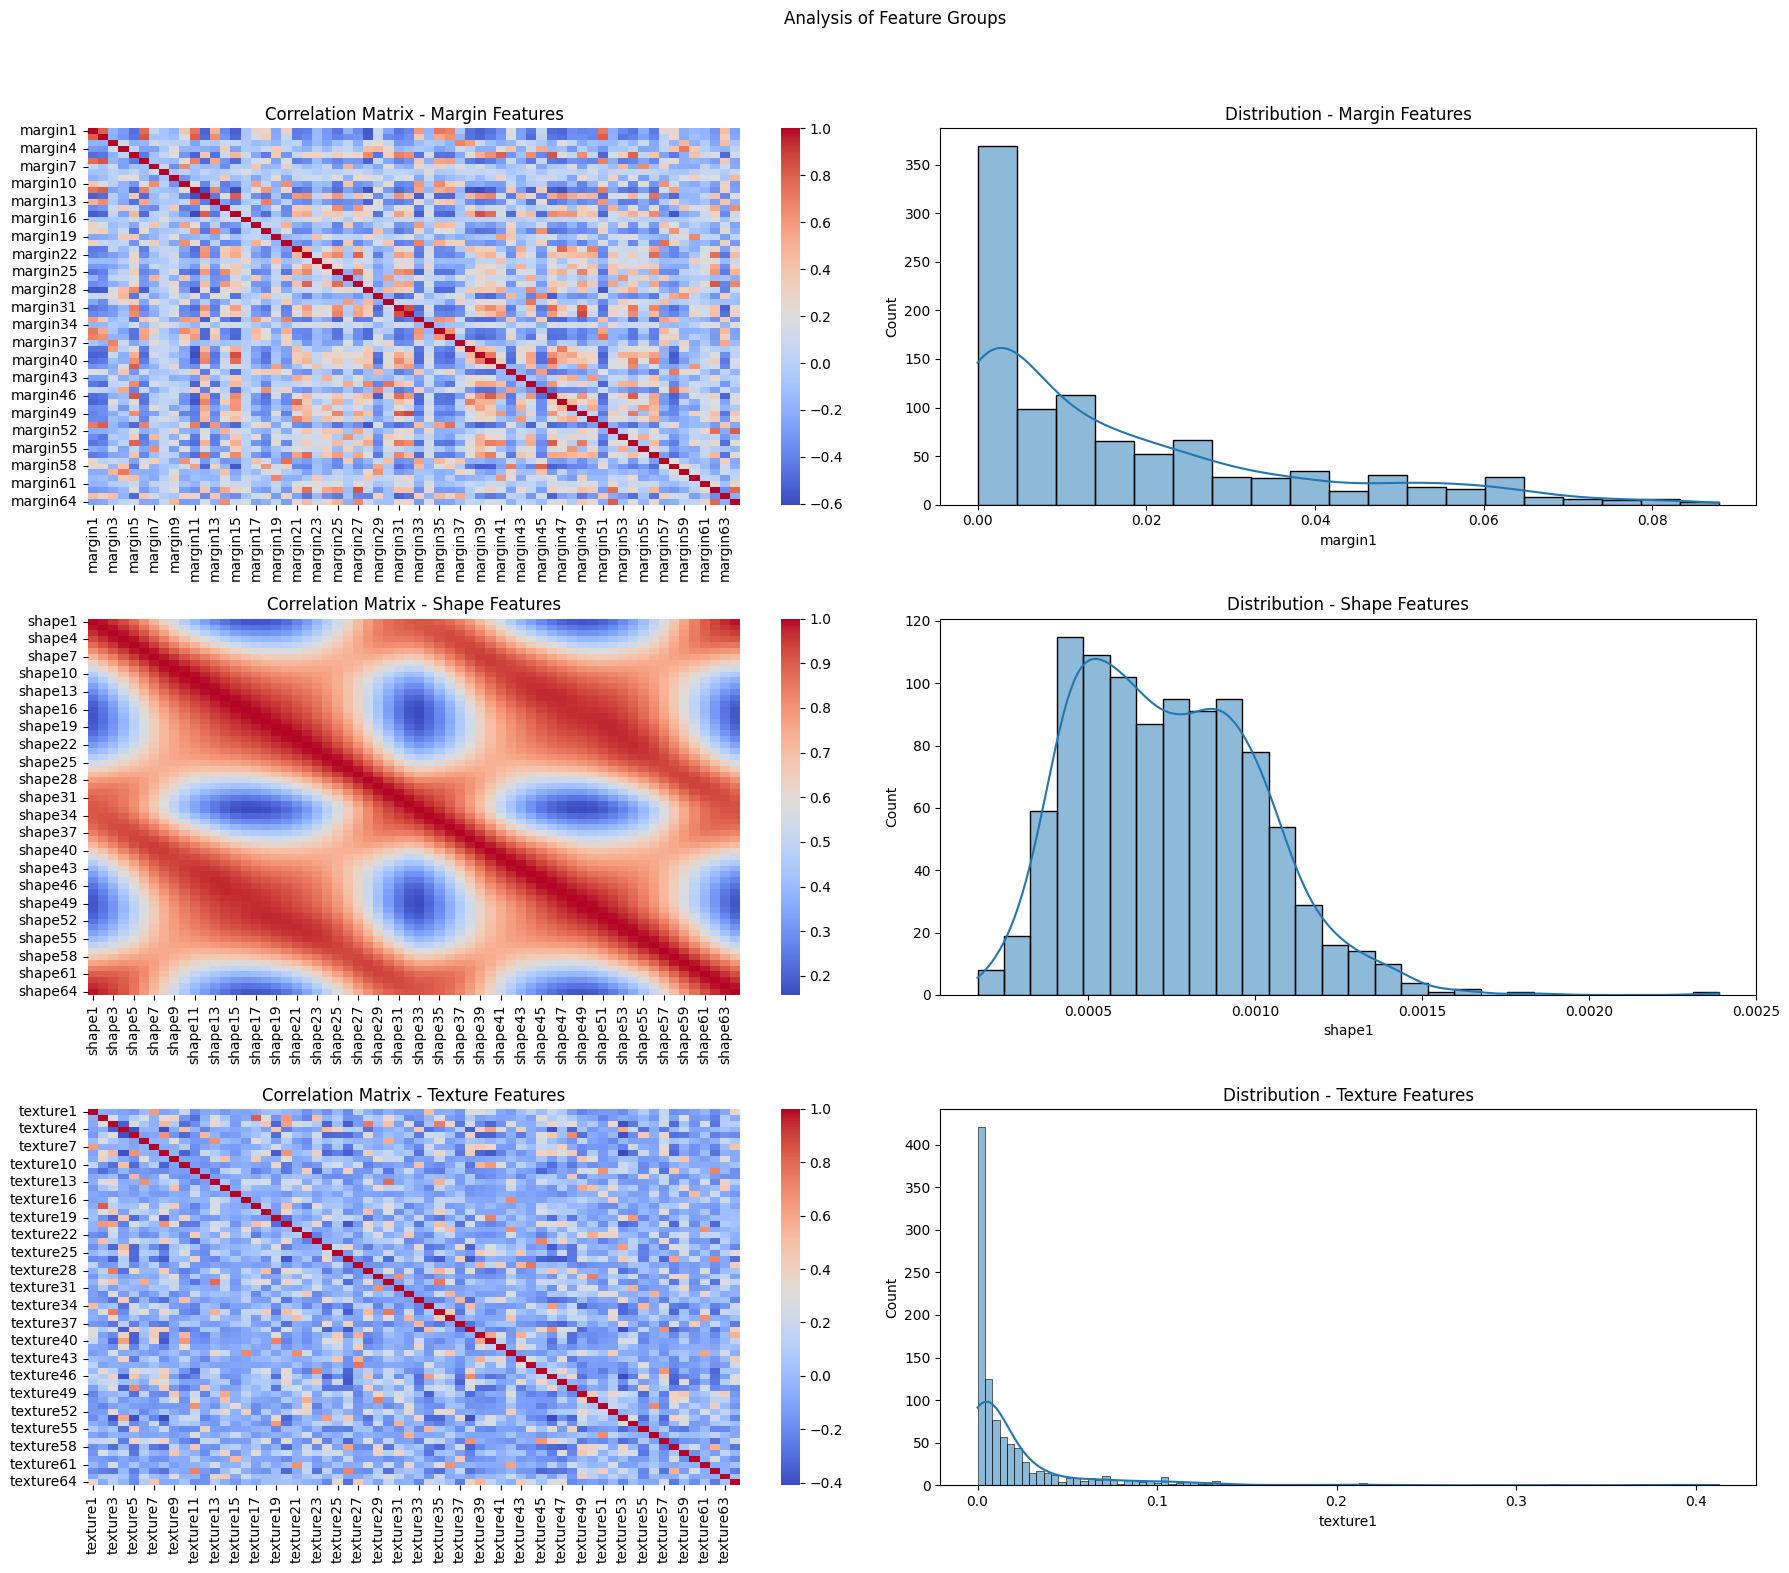

In [16]:
# Assuming features are grouped into margin, shape, and texture
margin_features = X_features.iloc[:, :64]
shape_features = X_features.iloc[:, 64:128]
texture_features = X_features.iloc[:, 128:]

feature_groups = [margin_features, shape_features, texture_features]
group_names = ['Margin Features', 'Shape Features', 'Texture Features']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
fig.suptitle('Analysis of Feature Groups')


# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

for layer_number, features in enumerate(feature_groups):
    # Calculate correlation matrix
    correlation_matrix = features.corr()

    # Plot correlation heatmap
    sns.heatmap(correlation_matrix, cmap='coolwarm', ax=axes[layer_number * 2])
    axes[layer_number * 2].set_title(f'Correlation Matrix - {group_names[layer_number]}')

    # Plot distribution for the first feature in the group
    sns.histplot(data=features, x=features.columns[0], kde=True, ax=axes[layer_number * 2 + 1])
    axes[layer_number * 2 + 1].set_title(f'Distribution - {group_names[layer_number]}')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Deciding which split method to use
<a id="divide-data"></a>

#### We got two methods for splitting:
<ol>
<li>train_test_split</li>
<li>StratifiedShuffleSplit (sss)</li>
</ol>

<b>train_test_split:</b></br>
Usage: Commonly used for general train-test splitting, especially when the class distribution is not a significant concern.<br>
How it works: Randomly shuffles and splits the data into training and test sets.<br>
Advantage: Simplicity and ease of use. Suitable for well-balanced datasets.<br>

<b>StratifiedShuffleSplit:</b></br>
Usage: Typically used when you want to ensure that the distribution of classes in both the training and validation sets is representative of the overall distribution in the dataset.<br>
How it works: StratifiedShuffleSplit maintains the class distribution when creating random splits. It shuffles the data and then creates splits, ensuring that each split has a similar class distribution.<br>
Advantage: Useful when dealing with imbalanced datasets where certain classes have significantly fewer samples than others.<br>

If the dataset has a <b>balanced</b> class distribution, and just need a simple split, train_test_split is often sufficient and easier to use.<br>

If the dataset has <b>imbalanced</b> classes, and want to ensure that the class distribution is maintained in both training and validation sets, then StratifiedShuffleSplit is a good choice.<br>

To decide which approach is better the dataset, we can can check the distribution of the 'species' column in our dataset.

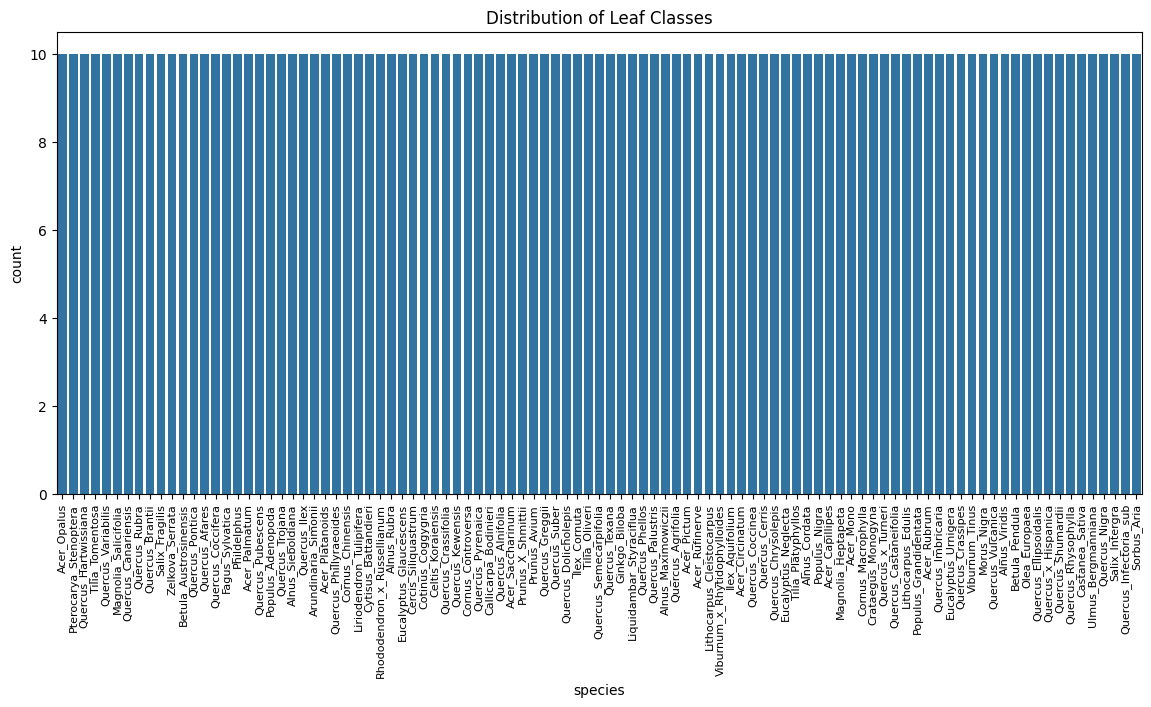

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(x='species', data=train_df)
plt.title('Distribution of Leaf Classes')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

-----> since all the bars are the same height that means its balanced and we can use the regular train_test_split method

In [18]:
# Exclude 'id' and 'species' columns
X_features = train_df.drop(['species'], axis=1)
# y_target = train_df['species']

<h2>Train/Test split</h2>
Divide the data into a training and testing set using approximately 80% for training

In [19]:
# test_size = 0.2 meaning that the training set will be 0.8 (80%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)
X_validation,X_test,y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [20]:
X_train

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
753,1213,0.003906,0.000000,0.017578,0.009766,0.021484,0.013672,0.023438,0.007812,0.001953,...,0.000000,0.000977,0.000000,0.071289,0.008789,0.050781,0.0,0.092773,0.002930,0.000000
215,364,0.000000,0.000000,0.003906,0.007812,0.048828,0.000000,0.005859,0.000000,0.013672,...,0.156250,0.025391,0.000000,0.004883,0.017578,0.000000,0.0,0.024414,0.000000,0.011719
294,487,0.001953,0.001953,0.031250,0.037109,0.017578,0.001953,0.039062,0.000000,0.005859,...,0.000977,0.000000,0.030273,0.000000,0.017578,0.000000,0.0,0.005859,0.043945,0.072266
49,78,0.000000,0.000000,0.021484,0.025391,0.029297,0.005859,0.000000,0.000000,0.023438,...,0.000000,0.000000,0.063477,0.000000,0.009766,0.000000,0.0,0.000000,0.039062,0.000000
720,1159,0.019531,0.041016,0.046875,0.009766,0.001953,0.046875,0.078125,0.000000,0.001953,...,0.006836,0.000000,0.006836,0.000977,0.019531,0.000000,0.0,0.005859,0.002930,0.011719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,190,0.011719,0.017578,0.115230,0.019531,0.015625,0.013672,0.017578,0.003906,0.001953,...,0.042969,0.000000,0.055664,0.000000,0.009766,0.000000,0.0,0.000000,0.000000,0.024414
270,449,0.003906,0.005859,0.003906,0.121090,0.000000,0.015625,0.005859,0.000000,0.000000,...,0.000000,0.000000,0.003906,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.041016
860,1378,0.064453,0.136720,0.011719,0.003906,0.000000,0.115230,0.001953,0.000000,0.009766,...,0.002930,0.000000,0.062500,0.002930,0.005859,0.000000,0.0,0.011719,0.000000,0.075195
435,714,0.000000,0.000000,0.009766,0.007812,0.027344,0.000000,0.023438,0.000000,0.001953,...,0.000000,0.000000,0.000000,0.159180,0.001953,0.025391,0.0,0.114260,0.006836,0.000000


In [21]:
y_train

753         Betula_Pendula
215         Acer_Rufinerve
294       Quercus_Kewensis
49        Acer_Saccharinum
720            Acer_Opalus
              ...         
106     Quercus_Variabilis
270          Olea_Europaea
860    Eucalyptus_Neglecta
435            Sorbus_Aria
102     Tilia_Platyphyllos
Name: species, Length: 792, dtype: object

<h2>Data Standardization</h2>
<a id="standardize-data"></a>

In [22]:
#TODO look at this
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Label Encoding</h2>
<a id="encode-labels"></a>

In [23]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_validation_encoded = label_encoder.transform(y_validation)

# Image Preprocessing

In [24]:
IMAGE_SIZE = 128

In [25]:
# import zipfile
# with zipfile.ZipFile('/data_files/images/leaf-classification/images.zip') as z_img:
#     z_img.extractall()
from PIL import Image, ImageOps
import cv2
import numpy as np
import glob
image_list = []

def resize_img(img):
     # height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    diff = int(abs(width-height)/2)
    color = (0,0,0)
    result = img.copy()
    if width<height:
        result = cv2.copyMakeBorder(result, 0,0,diff,diff, cv2.BORDER_CONSTANT, value=color)
    elif height>width:
        result = cv2.copyMakeBorder(result, diff,diff,0,0, cv2.BORDER_CONSTANT, value=color)
    
    # resize images
    result = cv2.resize(result, (IMAGE_SIZE,IMAGE_SIZE))
    
    image_list.append(result)
    return result
    
    # resize images
#     result = cv2.resize(result, (IMAGE_SIZE,IMAGE_SIZE))
# for filename in glob.glob('data_files/images/*.jpg'): #assuming jpg
#     # im=Image.open(filename)
#     img = cv2.imread(filename)
#     dimensions = img.shape
 
#     # height, width, number of channels in image
#     height = img.shape[0]
#     width = img.shape[1]
#     diff = int(abs(width-height)/2)
#     color = (0,0,0)
#     result = img.copy()
#     if width<height:
#         result = cv2.copyMakeBorder(result, 0,0,diff,diff, cv2.BORDER_CONSTANT, value=color)
#     elif height>width:
#         result = cv2.copyMakeBorder(result, diff,diff,0,0, cv2.BORDER_CONSTANT, value=color)
    
#     # resize images
#     result = cv2.resize(result, (IMAGE_SIZE,IMAGE_SIZE))
#     
    
# plt.figure(figsize=(24, 16))
# for i in range(25):
#     # j=np.random.choice((os.listdir('images')))
#     plt.subplot(5,5,i+1)
#     # img=load_img(os.path.join('/kaggle/working/images',j))
#     img = image_list[i]
#     plt.imshow(img)

<h1>Part II: Training the Neural Network</h1>

In [26]:
from keras.preprocessing import image

def load_img_data(data):
    data_ID = data['id']

    X = np.empty((len(data_ID), IMAGE_SIZE, IMAGE_SIZE, 1))
    for i, idnum in enumerate(data_ID):
        x = cv2.imread(("data_files/images/" + str(idnum) + '.jpg'), cv2.IMREAD_GRAYSCALE)
        x = image.img_to_array(resize_img(x))
        X[i] = x

    return np.around(X / 255.0)


In [27]:
import os
import sys
import numpy as np
import pandas as pd
import keras
import time
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input

In [28]:
#train data
train_x = load_img_data(X_train)
train_y = y_train_encoded
print(train_x.shape)
print(train_y.shape)

#validation data
validation_x = load_img_data(X_validation)
validation_y = y_validation_encoded
print(validation_x.shape)
print(validation_y.shape)

#test data
test_x = load_img_data(X_test)
test_y = y_test_encoded
print(test_x.shape)
print(test_y.shape)

(792, 128, 128, 1)
(792,)
(99, 128, 128, 1)
(99,)
(99, 128, 128, 1)
(99,)


In [29]:
# input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1), name='image')
# model = NaiveCovNet(input_layer)
# optimizer = keras.optimizers.Adam()
# # print(optimizer.learning_rate)
# # optimizer.learning_rate = 0.9
# # print(optimizer.learning_rate)
# model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [46]:
batch_sizes = [64,128,256]
numbers_of_layers = [1,2,3,4,5]
dropout_rates = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
optimizers = [(keras.optimizers.Adam,None),(keras.optimizers.SGD,0.01),(keras.optimizers.RMSprop,None),(keras.optimizers.Adagrad,0.5)]
weight_decays = [0.0001,0.001,0.01,0.05,0.1]
learning_rates = [0.0005,0.001,0.005,0.01]
learning_rate_schedulers = [
    None,
    keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,decay_steps=1000,decay_rate=0.9),
    keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=0.01,decay_steps=1000,decay_rate=0.9),
    keras.optimizers.schedules.CosineDecay(initial_learning_rate=0.01,decay_steps=1000),
    keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.01,decay_steps=1000)
    ]

# default
default_batch_size = 128
default_number_of_layers = 3
default_dropout_rate = 0.5
default_optimizer = keras.optimizers.Adam
default_weight_decay = 0.01
default_learning_rate = 0.001
default_learning_rate_scheduler = None

In [57]:
def generateModel(
        batch_size=default_batch_size,
        number_of_layers=default_number_of_layers,
        dropout_rate=default_dropout_rate,
        optimizer=default_optimizer,
        weight_decay=default_weight_decay,
        learning_rate=default_learning_rate,
        learning_rate_scheduler=default_learning_rate_scheduler):
    
    input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1), name='image')
    kernel_regularizer=keras.regularizers.L2(l2=weight_decay)
    def NaiveCovNet():
        BASE_CONV_FILTERS = 8
        x = input_layer
        for _ in range(number_of_layers):
            x = Conv2D(BASE_CONV_FILTERS, 5, padding='same')(x)
            x = (Activation('relu'))(x)
            x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)
            BASE_CONV_FILTERS*=2

        # Flatten our array
        x = Flatten()(x)
        x = Dense(2048, kernel_initializer='glorot_normal', activation='relu')(x)
        x = Dropout(dropout_rate)(x)

        x = Dense(99, kernel_initializer='glorot_normal', activation='relu')(x)
        x = Dropout(dropout_rate)(x)

        output_layer = Dense(99, activation='softmax')(x)
        model = Model(input_layer, output_layer)
        return model


    model = NaiveCovNet()
    # print(optimizer.learning_rate)
    # optimizer.learning_rate = 0.9
    # print(optimizer.learning_rate)
    optimizer_object = optimizer[0]()
        
    learning_rate_scheduler_name = str(learning_rate_scheduler.__class__).split(".")[-1][:-2]
    
    if optimizer[1] is not None:
        optimizer_object.learning_rate=optimizer[1]

    if learning_rate_scheduler is None:
        if optimizer[1] is not None:
            optimizer_object.learning_rate=optimizer[1]
        else:
            optimizer_object.learning_rate = learning_rate
        learning_rate_scheduler_name = "fixed"
    
    model.compile(optimizer=optimizer_object, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    optimizer_name = str(optimizer_object.__class__).split(".")[-1][:-2]
    
    hyperparameters = [batch_size,number_of_layers,dropout_rate,optimizer_name,weight_decay,learning_rate,learning_rate_scheduler_name]

    def getLogName():
        return " ".join([str(x) for x in hyperparameters])
    
    print(getLogName())
        
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs/{}/{}".format(getLogName(),time.time()))
    patience_callback =  keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(train_x, train_y,validation_data=(validation_x,validation_y), epochs=100, batch_size=batch_size, callbacks=[tensorboard_callback,patience_callback])
    return model

In [32]:
# model = generateModel(default_batch_size,default_number_of_layers,default_dropout_rate,default_optimizer,default_weight_decay,default_learning_rate,default_learning_rate_scheduler)
# evaluation = model.evaluate(test_x, test_y)

In [51]:
testing_logs = []

In [33]:
#test batch sizes

testing_accuracies = []

for batch_size in batch_sizes:
    model = generateModel(batch_size=batch_size)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])

testing_logs.append("\nBatch Sizes:")
for i in range(len(batch_sizes)):
    log = f"{batch_sizes[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       208       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        3216      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 16)        0         
                                                            

In [34]:
#test number of convolution layers

testing_accuracies = []

for number_of_layers in numbers_of_layers:
    model = generateModel(number_of_layers=number_of_layers)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])

testing_logs.append("\nConvolution Layers:")
for i in range(len(numbers_of_layers)):
    log = f"{numbers_of_layers[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 8)       208       
                                                                 
 activation_9 (Activation)   (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 8)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_9 (Dense)             (None, 2048)              67110912  
                                                           

In [35]:
#test dropout rates

testing_accuracies = []

for dropout_rate in dropout_rates:
    model = generateModel(dropout_rate = dropout_rate)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])

testing_logs.append("\nDropout Rates:")
for i in range(len(dropout_rates)):
    log = f"{dropout_rates[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_24 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_25 (Activation)  (None, 64, 64, 16)        0         
                                                           

In [58]:
#test optimizers

testing_accuracies = []

for optimizer in optimizers:
    model = generateModel(optimizer=optimizer)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    
testing_logs.append("\nOptimizers:")
for i in range(len(optimizers)):
    #TODO investigate adagrad, sgd
    optimizer_name = str(optimizers[i][0].__class__).split(".")[-1][:-2]
    log = f"{optimizer_name}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_114 (Conv2D)         (None, 128, 128, 8)       208       
                                                                 
 activation_114 (Activation  (None, 128, 128, 8)       0         
 )                                                               
                                                                 
 max_pooling2d_114 (MaxPool  (None, 64, 64, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_115 (Conv2D)         (None, 64, 64, 16)        3216      
                                                                 
 activation_115 (Activation  (None, 64, 64, 16)        0  

In [37]:
#test weight decays

testing_accuracies = []

for weight_decay in weight_decays:
    model = generateModel(weight_decay = weight_decay)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])

testing_logs.append("\nL2 Weight decays:")
for i in range(len(weight_decays)):
    log = f"{weight_decays[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_51 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_51 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_52 (Activation)  (None, 64, 64, 16)        0         
                                                          

In [38]:
#test learning rates

testing_accuracies = []

for learning_rate in learning_rates:
    model = generateModel(learning_rate = learning_rate)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])

testing_logs.append("\nLearning Rates:")
for i in range(len(learning_rates)):
    log = f"{learning_rates[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_66 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_66 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_67 (Activation)  (None, 64, 64, 16)        0         
                                                          

In [41]:
#test learning rate schedulers

testing_accuracies = []

for learning_rate_scheduler in learning_rate_schedulers:
    model = generateModel(learning_rate_scheduler=learning_rate_scheduler)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])

testing_logs.append("\nLearning Rate Schedulers:")
for i in range(len(learning_rate_schedulers)):
    learning_rate_scheduler_name = str(learning_rate_schedulers[i].__class__).split(".")[-1][:-2]
    if learning_rate_schedulers[i] is None:
        learning_rate_scheduler_name = "fixed"
    log = f"{learning_rate_scheduler_name}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_84 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_84 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_85 (Activation)  (None, 64, 64, 16)        0         
                                                          